<a href="https://colab.research.google.com/github/Tanvi3Mane/FoodPricePrediction/blob/main/FoodPricePrediction_TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Table of Contents

>[Importing Data](#scrollTo=kO_4LaFem5c1)

>[Data Processing](#scrollTo=t19cd9EnnFDb)

>[Data analysis](#scrollTo=vwbjCNMj59MO)

>>[EDA](#scrollTo=xj7DCTy50lg0)

>>[Data Visalization](#scrollTo=AdVe_HNemDkg)

>>[Time Series Forecasting](#scrollTo=FQ8VLU9cys0W)

>[Segregating data for Data Warehouse creation using SSIS and Oracle Database](#scrollTo=wwPPHFRInWz8)



# Importing Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('wfp_market_food_prices.csv', encoding = "ISO-8859-1")
df

,country_id (adm0_id),country_name (adm0_name),region/locality id (adm1_id),region/locality name (adm1_name),market_id (mkt_id),market_name (mkt_name),commodity_id (cm_id),commodity_name (cm_name),currency_id (cur_id),currency_name (cur_name),marketType_id (pt_id),marketType_name (pt_name),measurement_id (um_id),measurement_name (um_name),mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743909,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,156,Sesame,83,SSP,15,Retail,47,3.5 KG,5,2017,400.0,WFP
743910,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,2,2017,12.5,WFP
743911,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,3,2017,95.0,WFP
743912,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,15,Retail,15,L,2,2017,95.0,WFP


# Data Processing

In [ ]:
# Check if any duplicates in the data
x =df.duplicated()
x.value_counts()

False    743914
dtype: int64

In [ ]:
# Check if data has any missing values
df.isna().sum()

country_id (adm0_id)                    0
country_name (adm0_name)                0
region/locality id (adm1_id)            0
region/locality name (adm1_name)    13949
market_id (mkt_id)                      0
market_name (mkt_name)                  0
commodity_id (cm_id)                    0
commodity_name (cm_name)                0
currency_id (cur_id)                    0
currency_name (cur_name)                0
marketType_id (pt_id)                   0
marketType_name (pt_name)               0
measurement_id (um_id)                  0
measurement_name (um_name)              0
mp_month                                0
mp_year                                 0
mp_price                                0
mp_commoditysource                      0
dtype: int64

In [ ]:
# Filling missing value with "Unknown"
df['region/locality name (adm1_name)'].fillna('Unknown', inplace = True)

In [ ]:
# Displaying again
df.isna().sum()

country_id (adm0_id)                0
country_name (adm0_name)            0
region/locality id (adm1_id)        0
region/locality name (adm1_name)    0
market_id (mkt_id)                  0
market_name (mkt_name)              0
commodity_id (cm_id)                0
commodity_name (cm_name)            0
currency_id (cur_id)                0
currency_name (cur_name)            0
marketType_id (pt_id)               0
marketType_name (pt_name)           0
measurement_id (um_id)              0
measurement_name (um_name)          0
mp_month                            0
mp_year                             0
mp_price                            0
mp_commoditysource                  0
dtype: int64

In [ ]:
df.shape

(743914, 18)

In [1]:
# Saving Data as csv
df.to_csv('wfp_Original.csv')

# Data analysis

In [ ]:
# Renaming columns
df.rename(columns = {'country_id (adm0_id)':'country_id', 'country_name (adm0_name)':'country_name',
                     'region/locality id (adm1_id)':'region_id', 'region/locality name (adm1_name)':'region_name',
                     'market_id (mkt_id)':'market_id','market_name (mkt_name)':'market_name',
                     'commodity_id (cm_id)':'commodity_id','commodity_name (cm_name)':'commodity_name',
                     'marketType_name (pt_name)':'market_type','measurement_id (um_id)':'unit_id',
                     'measurement_name (um_name)':'unit_name', 'currency_name (cur_name)':'currency_name'},
          inplace = True)

df

,country_id,country_name,region_id,region_name,market_id,market_name,commodity_id,commodity_name,currency_id (cur_id),currency_name,marketType_id (pt_id),market_type,unit_id,unit_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743909,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,156,Sesame,83,SSP,15,Retail,47,3.5 KG,5,2017,400.0,WFP
743910,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,2,2017,12.5,WFP
743911,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,3,2017,95.0,WFP
743912,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,15,Retail,15,L,2,2017,95.0,WFP


In [ ]:
df.drop(columns =['currency_id (cur_id)','marketType_id (pt_id)','mp_commoditysource'], inplace = True)
df

,country_id,country_name,region_id,region_name,market_id,market_name,commodity_id,commodity_name,currency_name,market_type,unit_id,unit_name,mp_month,mp_year,mp_price
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,AFN,Retail,5,KG,1,2014,50.0
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,AFN,Retail,5,KG,2,2014,50.0
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,AFN,Retail,5,KG,3,2014,50.0
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,AFN,Retail,5,KG,4,2014,50.0
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,AFN,Retail,5,KG,5,2014,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743909,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,156,Sesame,SSP,Retail,47,3.5 KG,5,2017,400.0
743910,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),SSP,Retail,15,L,2,2017,12.5
743911,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),SSP,Retail,15,L,3,2017,95.0
743912,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),SSP,Retail,15,L,2,2017,95.0


In [ ]:
df['country_name'][df['commodity_name']=='Bread'].unique()

array(['Afghanistan', 'Algeria', 'Congo', 'Djibouti', 'Gambia',
       'Guatemala', 'Guinea', 'Kenya', 'Kyrgyzstan', 'Nigeria',
       'Tajikistan', 'State of Palestine'], dtype=object)

In [ ]:
# Change country and commodity that you need forecasted price for

df_India_Wheat=df[(df['country_name']=='India') & (df['commodity_name']=='Wheat')]
df_India_Wheat

,country_id,country_name,region_id,region_name,market_id,market_name,commodity_id,commodity_name,currency_name,market_type,unit_id,unit_name,mp_month,mp_year,mp_price
157245,115,India,1510,Uttar Pradesh,922,Agra,84,Wheat,INR,Retail,5,KG,1,2011,12.50
157246,115,India,1510,Uttar Pradesh,922,Agra,84,Wheat,INR,Retail,5,KG,2,2011,13.50
157247,115,India,1510,Uttar Pradesh,922,Agra,84,Wheat,INR,Retail,5,KG,3,2011,15.00
157248,115,India,1510,Uttar Pradesh,922,Agra,84,Wheat,INR,Retail,5,KG,4,2011,12.36
157249,115,India,1510,Uttar Pradesh,922,Agra,84,Wheat,INR,Retail,5,KG,5,2011,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223676,115,India,0,Unknown,1887,National Average,84,Wheat,INR,Retail,5,KG,12,2016,24.56
223677,115,India,0,Unknown,1887,National Average,84,Wheat,INR,Retail,5,KG,1,2017,24.51
223678,115,India,0,Unknown,1887,National Average,84,Wheat,INR,Retail,5,KG,2,2017,24.65
223679,115,India,0,Unknown,1887,National Average,84,Wheat,INR,Retail,5,KG,3,2017,24.41


In [ ]:
df_India_Wheat=df[(df['country_name']=='India') & (df['commodity_name']=='Wheat')]
df_India_Wheat = df_India_Wheat[['region_name','market_name','commodity_name','mp_month',
                                                           'mp_year','mp_price']]
df_India_Wheat.head(40)

,region_name,market_name,commodity_name,mp_month,mp_year,mp_price
157245,Uttar Pradesh,Agra,Wheat,1,2011,12.50
157246,Uttar Pradesh,Agra,Wheat,2,2011,13.50
157247,Uttar Pradesh,Agra,Wheat,3,2011,15.00
157248,Uttar Pradesh,Agra,Wheat,4,2011,12.36
157249,Uttar Pradesh,Agra,Wheat,5,2011,12.00
157250,Uttar Pradesh,Agra,Wheat,6,2011,12.00
157251,Uttar Pradesh,Agra,Wheat,7,2011,12.21
157252,Uttar Pradesh,Agra,Wheat,8,2011,12.50
157253,Uttar Pradesh,Agra,Wheat,9,2011,12.11
157254,Uttar Pradesh,Agra,Wheat,10,2011,12.00


In [ ]:
from datetime import datetime

# Convert year and month to Date
df_India_Wheat['date'] = pd.to_datetime(df_India_Wheat['mp_year'].astype(str) + df_India_Wheat['mp_month'].astype(str), format='%Y%m')
wheat_prices_cleaned = df_India_Wheat.drop(['mp_year', 'mp_month'], axis=1)

# See the result
print(wheat_prices_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5762 entries, 157245 to 223680
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   region_name     5762 non-null   object        
 1   market_name     5762 non-null   object        
 2   commodity_name  5762 non-null   object        
 3   mp_price        5762 non-null   float64       
 4   date            5762 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 270.1+ KB
None


## EDA

In [ ]:
df

In [ ]:
India_df= df[df['country_name']=='India']

In [ ]:
India_df

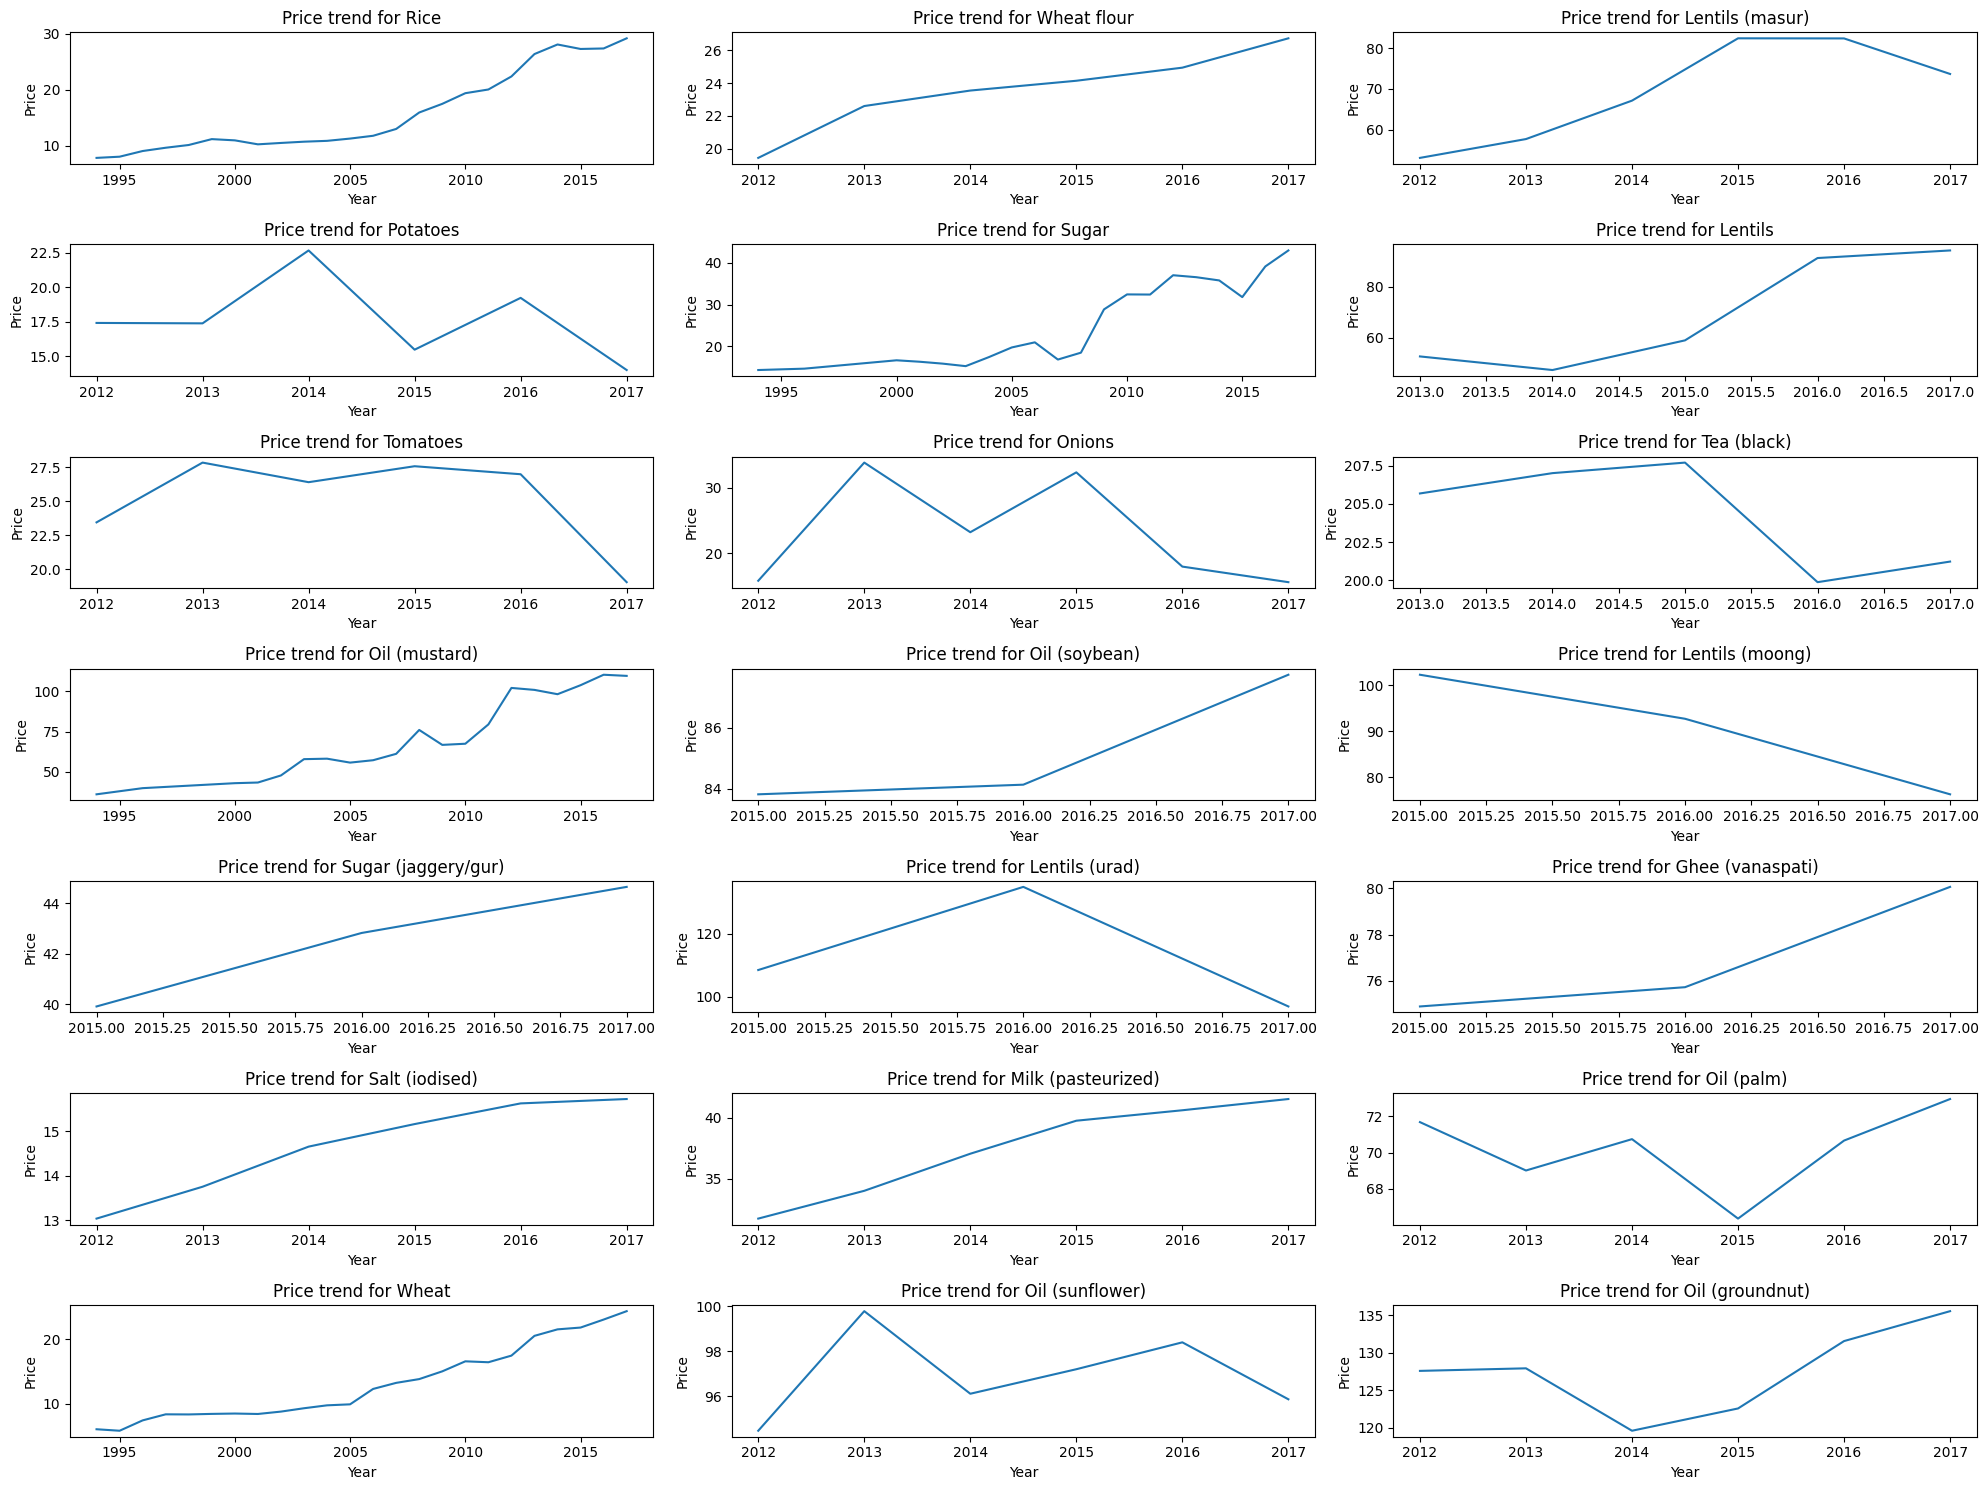

In [ ]:
commodities = India_df["commodity_name"].unique()

# group data by year and commodity
grouped_data_ng = India_df.groupby(['mp_year', 'commodity_name'])['mp_price'].mean().reset_index()

# define number of rows and columns in plot grid
num_rows = len(commodities) // 3 + (len(commodities) % 3 > 0)
num_cols = 3

# create plot grid with specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# loop through commodities and plot each one in its own subplot
for i, commodity in enumerate(commodities):
    # filter data for the current commodity
    commodity_data = grouped_data_ng[grouped_data_ng['commodity_name'] == commodity]

    # calculate the row and column index for the current subplot
    row_idx = i // num_cols
    col_idx = i % num_cols

    # plot the data in the current subplot
    axs[row_idx, col_idx].plot(commodity_data['mp_year'], commodity_data['mp_price'])
    axs[row_idx, col_idx].set_title(f'Price trend for {commodity}')
    axs[row_idx, col_idx].set_xlabel('Year')
    axs[row_idx, col_idx].set_ylabel('Price')

# remove any unused subplots
for i in range(len(commodities), num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[row_idx, col_idx].axis('off')

# adjust spacing between subplots
fig.tight_layout()

## Data Visalization

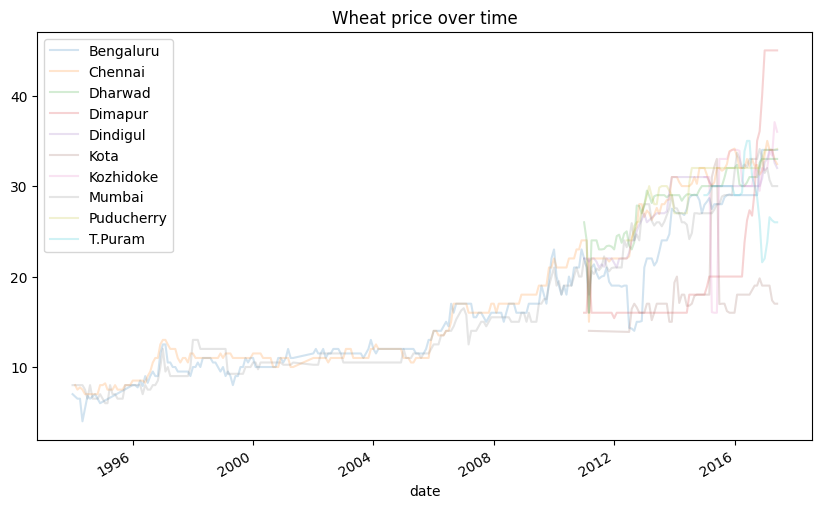

In [ ]:
import matplotlib.pyplot as plt

# Calculate the top 10 markets by max price
top_markets = wheat_prices_cleaned.groupby('market_name')['mp_price'].max().nlargest(10).index.tolist()

# Filter the dataframe to include only the top 10 markets
wheat_prices_filtered = wheat_prices_cleaned[wheat_prices_cleaned['market_name'].isin(top_markets)]

# Draw a line plot of price vs. date grouped by market
fig, ax = plt.subplots(figsize=(10,6))
for market, data in wheat_prices_filtered.groupby('market_name'):
    data.plot(x='date', y='mp_price', ax=ax, alpha=0.2, label=market)
ax.set_title('Wheat price over time')
ax.legend()
plt.show()

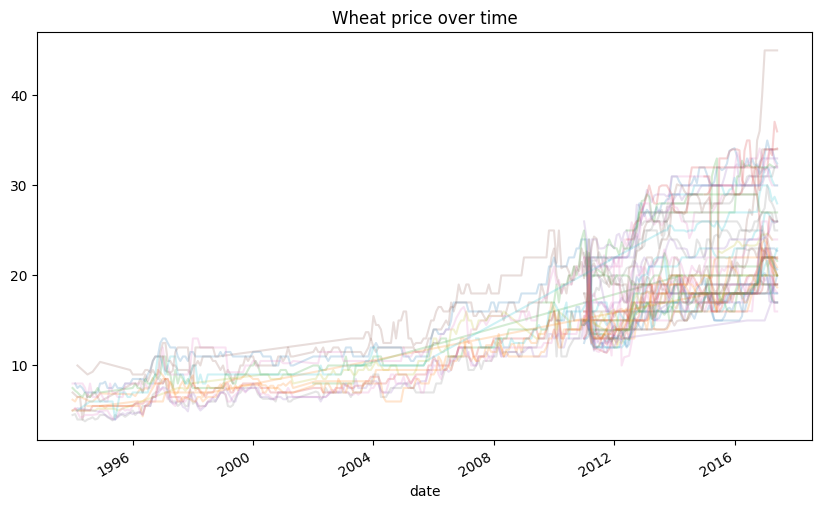

In [ ]:
import matplotlib.pyplot as plt

# Draw a line plot of price vs. date grouped by market
fig, ax = plt.subplots(figsize=(10,6))
wheat_prices_cleaned.groupby('market_name').plot(x='date', y='mp_price', ax=ax, alpha=0.2, legend= False)
ax.set_title('Wheat price over time')
plt.show()

In [ ]:
# Group by date, and calculate the median price
wheat_prices_summarized = wheat_prices_cleaned.groupby('date')['mp_price'].median().reset_index(name='median_price')

# See the result
print(wheat_prices_summarized)

          date  median_price
0   1994-01-01         6.200
1   1994-02-01         5.625
2   1994-03-01         6.500
3   1994-04-01         6.500
4   1994-05-01         5.700
..         ...           ...
270 2017-02-01        23.000
271 2017-03-01        22.290
272 2017-04-01        22.000
273 2017-05-01        22.000
274 2017-06-01        21.840

[275 rows x 2 columns]


## Time Series Forecasting

In [ ]:
# Extraction of time series
wheat_time_series = pd.Series(
    wheat_prices_summarized['median_price'].values,
    pd.to_datetime(wheat_prices_summarized['date'], format='%Y-%m-%d')
).reindex(
    pd.date_range(start=wheat_prices_summarized['date'].min(),
                  end=wheat_prices_summarized['date'].max(), freq='MS'),
    method = 'ffill'
)

print(wheat_time_series.head(20))

1994-01-01    6.200
1994-02-01    5.625
1994-03-01    6.500
1994-04-01    6.500
1994-05-01    5.700
1994-06-01    5.000
1994-07-01    6.000
1994-08-01    6.000
1994-09-01    5.750
1994-10-01    6.000
1994-11-01    5.750
1994-12-01    6.000
1995-01-01    5.350
1995-02-01    5.300
1995-03-01    5.500
1995-04-01    5.500
1995-05-01    5.350
1995-06-01    4.850
1995-07-01    5.250
1995-08-01    6.000
Freq: MS, dtype: float64


2017-07-01    21.871592
2017-08-01    21.871592
2017-09-01    21.871592
2017-10-01    21.871592
2017-11-01    21.871592
2017-12-01    21.871592
2018-01-01    21.871592
2018-02-01    21.871592
2018-03-01    21.871592
2018-04-01    21.871592
2018-05-01    21.871592
2018-06-01    21.871592
Freq: MS, dtype: float64


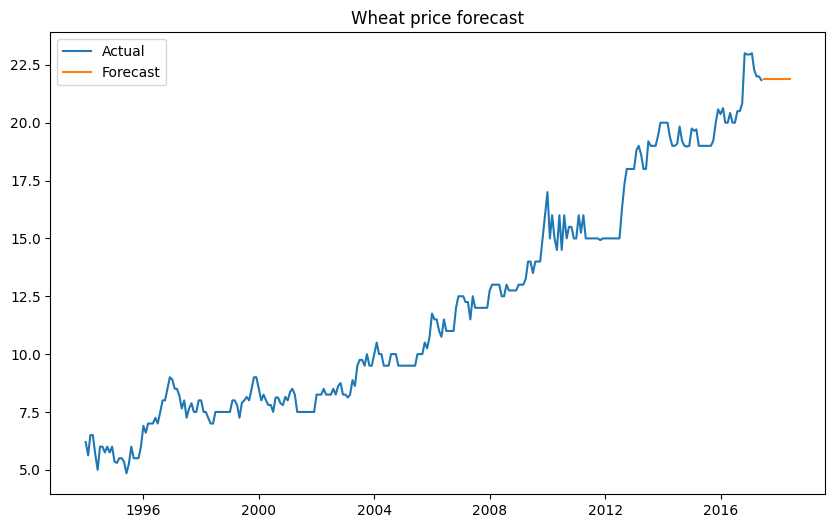

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

# Forecast the potato time series
wheat_price_model = ExponentialSmoothing(wheat_time_series).fit()
wheat_price_forecast = pd.Series(wheat_price_model.forecast(12),
                                 index=pd.date_range(start=wheat_time_series.index[-1]+pd.DateOffset(months=1),
                                                     periods=12, freq='MS'))

# View it
print(wheat_price_forecast)

# Plot the forecast
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(wheat_time_series, label='Actual')
ax.plot(wheat_price_forecast, label='Forecast')
ax.set_title('Wheat price forecast')
ax.legend()
plt.show()

# Segregating data for Data Warehouse creation using SSIS and Oracle Database

In [ ]:
df

,country_id (adm0_id),country_name (adm0_name),region/locality id (adm1_id),region/locality name (adm1_name),market_id (mkt_id),market_name (mkt_name),commodity_id (cm_id),commodity_name (cm_name),currency_id (cur_id),currency_name (cur_name),marketType_id (pt_id),marketType_name (pt_name),measurement_id (um_id),measurement_name (um_name),mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743909,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,156,Sesame,83,SSP,15,Retail,47,3.5 KG,5,2017,400.0,WFP
743910,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,2,2017,12.5,WFP
743911,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,3,2017,95.0,WFP
743912,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,15,Retail,15,L,2,2017,95.0,WFP


In [ ]:
count = df['commodity_id (cm_id)'].unique()
count.shape

(321,)

Exploratory -
Data of 74 countries
Across 588 regions
321 commodities




COUNTRY DATA

In [ ]:
id = pd.Series(df['country_id (adm0_id)'].unique())
id

0         1
1         4
2        13
3        19
4        23
      ...  
69      271
70      999
71    40764
72    40765
73    70001
Length: 74, dtype: int64

In [ ]:
name = pd.Series(df['country_name (adm0_name)'].unique())
name

0            Afghanistan
1                Algeria
2                Armenia
3             Azerbaijan
4             Bangladesh
             ...        
69              Zimbabwe
70    State of Palestine
71                 Sudan
72                 Egypt
73           South Sudan
Length: 74, dtype: object

In [ ]:
df_country = pd.concat([id, name], axis=1)
df_country.rename(columns = {0:'country_id', 1: 'country_name'}, inplace = True)
df_country

,country_id,country_name
0,1,Afghanistan
1,4,Algeria
2,13,Armenia
3,19,Azerbaijan
4,23,Bangladesh
...,...,...
69,271,Zimbabwe
70,999,State of Palestine
71,40764,Sudan
72,40765,Egypt


In [ ]:
df_country.to_csv('wfp_countries.csv')

REGIONAL DATA

In [ ]:
df_region = df[['region/locality id (adm1_id)','region/locality name (adm1_name)']]
df_region.drop_duplicates(inplace = True)

<ipython-input-25-f4f604e9f696>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region.drop_duplicates(inplace = True)


In [ ]:
df_region.rename(columns = {'region/locality id (adm1_id)':'region_id', 'region/locality name (adm1_name)': 'region_name'}, inplace = True)
df_region

<ipython-input-26-28493572f449>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region.rename(columns = {'region/locality id (adm1_id)':'region_id', 'region/locality name (adm1_name)': 'region_name'}, inplace = True)


,region_id,region_name
0,272,Badakhshan
610,275,Balkh
1216,276,Bamyan
1237,278,Faryab
1707,282,Hirat
...,...,...
741021,2748,Central Equatoria
741971,37021,Upper Nile
742504,2746,Lakes
742905,2766,Western Bahr El Ghazal


In [ ]:
df_region.to_csv('wfp_regions.csv')

MARKET DATA

In [ ]:
id = pd.Series(df['market_id (mkt_id)'].unique())
id

0        266
1        267
2        268
3        269
4        270
        ... 
1466    1388
1467    1389
1468    1390
1469    1391
1470    1786
Length: 1471, dtype: int64

In [ ]:
name = pd.Series(df['market_name (mkt_name)'].unique())
name

0          Fayzabad
1             Mazar
2            Bamyan
3           Maymana
4             Hirat
           ...     
1444    Konyo Konyo
1445        Malakal
1446         Rumbek
1447            Jau
1448          Torit
Length: 1449, dtype: object

In [ ]:
df_market = pd.read_csv('wfp_markets_global.csv')
df_market

FileNotFoundError: ignored

In [ ]:
df_market.to_csv('wfp_markets.csv')

COMMODITIES DATA

In [ ]:
df_commodity = pd.read_csv('wfp_commodities_global.csv')
df_commodity

In [ ]:
df_commodity.to_csv('wfp_commodities.csv')

CURRENCY DATA

In [ ]:
id = pd.Series(df['currency_id (cur_id)'].unique())
id

In [ ]:
name = pd.Series(df['currency_name (cur_name)'].unique())
name

In [ ]:
df_currency = pd.concat([id, name], axis=1)
df_currency.rename(columns = {0:'currency_id', 1: 'currency_name'}, inplace = True)
df_currency

In [ ]:
df_currency.to_csv('wfp_currencies.csv')

MEASUREMENT DATA

In [ ]:
id = pd.Series(df['measurement_id (um_id)'].unique())
id

In [ ]:
name = pd.Series(df['measurement_name (um_name)'].unique())
name

In [ ]:
df_unit = pd.concat([id, name], axis=1)
df_unit.rename(columns = {0:'unit_id', 1: 'unit_name'}, inplace = True)
df_unit

In [ ]:
df_unit.to_csv('wfp_units.csv')

MERGING MARKET DATA WITH MARKET_TYPE DATA

In [ ]:
x = df[['market_id (mkt_id)','marketType_id (pt_id)','marketType_name (pt_name)' ]]
x= x.drop_duplicates()
x

In [ ]:
df_market

In [ ]:
df_mark =pd.merge(x, df_market, left_on = 'market_id (mkt_id)', right_on= 'market_id', how = "right")
df_mark

In [ ]:
df_mark.drop(columns = ['market_id (mkt_id)'], inplace = True)
df_mark

In [ ]:
df_mark.drop(df_mark[df_mark['market_id'].isna()].index, inplace = True)
df_mark

In [ ]:
df_mark.rename(columns= {'marketType_id (pt_id)': 'market_type_id','marketType_name (pt_name)': 'market_type', 'countryiso3': 'countryISO', 'market':'market_name'}, inplace = True)
df_mark.drop(['market_type_id'], axis =1, inplace = True)
df_mark

In [ ]:
 df_mark.drop_duplicates(subset=['market_id'], inplace=True)


In [ ]:
df_mark.isna().sum()

In [ ]:
df_mark['market_type'].fillna('Unknown',inplace = True)
df_mark['admin1'].fillna('Unknown',inplace = True)
df_mark['admin2'].fillna('Unknown',inplace = True)
df_mark['latitude'].fillna('Unknown',inplace = True)
df_mark['longitude'].fillna('Unknown', inplace = True)

In [ ]:
df_mark.to_csv('wfp_markets.csv')

DATE DATA

In [ ]:
month = pd.Series(df['mp_month'])
month

In [ ]:
year = pd.Series(df['mp_year'])
year

In [ ]:
df_date = pd.concat([month,year],axis =1)
df_date.drop_duplicates()

In [ ]:
df_date['date_id'] = df_date['mp_month'].astype(str) + df_date['mp_year'].astype(str)
df_date

In [ ]:
df_date.to_csv('wfp_dates.csv')

Merging currency and country data to form country csv

In [ ]:
df_count_curr = df[['country_id (adm0_id)','country_name (adm0_name)','currency_name (cur_name)']]
df_count_curr

In [ ]:
 df_count_curr.drop_duplicates(subset=['country_id (adm0_id)'], inplace=True)
 df_count_curr

In [ ]:
df_count_curr.rename(columns = {'country_id (adm0_id)':'country_id','country_name (adm0_name)':'country_name','currency_name (cur_name)':'currency_name'}, inplace = True)
df_count_curr

In [ ]:
df_count_curr.to_csv('wfp_countriesAndCurrency.csv')

FACT TABLE

In [ ]:
df['date_id']=df['mp_month'].astype(str) + df['mp_year'].astype(str)
df

In [ ]:
df.drop(columns = ['country_name (adm0_name)', 'region/locality name (adm1_name)',
                   'market_name (mkt_name)', 'commodity_name (cm_name)','marketType_id (pt_id)',
                   'marketType_name (pt_name)', 'measurement_name (um_name)', 'mp_month','mp_year','mp_commoditysource', 'currency_id (cur_id)',
                   'currency_name (cur_name)'], inplace = True)

In [ ]:
df.rename(columns = {'country_id (adm0_id)':'country_id', 'region/locality id (adm1_id)':'region_id','market_id (mkt_id)':'market_id',
                     'commodity_id (cm_id)':'comodity_id','measurement_id (um_id)':'unit_id'},inplace = True)
df

In [ ]:
df.to_csv('wfp_main.csv')